In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city_data_to_load = 'Resource/city_data.csv'
ride_data_to_load = 'Resource/ride_data.csv'

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
sum(city_data_df["type"]=="Urban")

66

In [15]:
sum(city_data_df["type"]=="Suburban")

36

In [16]:
sum(city_data_df["type"]=="Rural")

18

In [17]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [18]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [19]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [21]:
pyber_data_df = pd.merge(ride_data_df,city_data_df, how="left", on=["city","city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [22]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [23]:
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [24]:
#Creating Urban city Data frame
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [25]:
#Creating Suburban city Data frame
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [26]:
#Creating Rural city Data frame
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [28]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [30]:
# Get the number of rides for Suburban cities
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count.head(10)

city
Barronchester      16
Bethanyland        18
Brandonfort        19
Colemanland        22
Davidfurt          17
East Aaronbury      9
East Danielview    17
East Kentstad      13
East Marymouth     27
Grayville          15
Name: ride_id, dtype: int64

In [54]:
# Get the number of rides for Rural cities
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count.head(10)

city
Bradshawfurt       10
Garzaport           3
Harringtonfort      6
Jessicaport         6
Lake Jamie          6
Lake Latoyabury    11
Michaelberg        12
New Ryantown        6
Newtonview          4
North Holly         9
Name: ride_id, dtype: int64

In [33]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head(10)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
East Kaylahaven    23.757931
Erikaland          24.906667
Grahamburgh        25.221200
Huntermouth        28.993750
Hurleymouth        25.891429
Name: fare, dtype: float64

In [34]:
# Get average fare for each city in the Suburban cities.
suburbun_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
suburbun_avg_fare.head(10)

city
Barronchester      36.422500
Bethanyland        32.956111
Brandonfort        35.437368
Colemanland        30.894545
Davidfurt          31.995882
East Aaronbury     25.661111
East Danielview    31.560588
East Kentstad      29.823077
East Marymouth     30.835185
Grayville          27.763333
Name: fare, dtype: float64

In [35]:
# Get average fare for each city in the Rural cities.
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
rural_avg_fare.head(10)

city
Bradshawfurt       40.064000
Garzaport          24.123333
Harringtonfort     33.470000
Jessicaport        36.013333
Lake Jamie         34.358333
Lake Latoyabury    26.061818
Michaelberg        34.997500
New Ryantown       43.278333
Newtonview         36.745000
North Holly        29.130000
Name: fare, dtype: float64

In [36]:
# Get average drivers for each city in the Urban cities.
urban_avg_drivers = urban_cities_df.groupby("city").mean()["driver_count"]
urban_avg_drivers.head(10)

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
East Kaylahaven    65.0
Erikaland          37.0
Grahamburgh        61.0
Huntermouth        37.0
Hurleymouth        36.0
Name: driver_count, dtype: float64

In [37]:
# Get average drivers for each city in the Suburban cities.
suburban_avg_drivers = suburban_cities_df.groupby("city").mean()["driver_count"]
suburban_avg_drivers.head(10)

city
Barronchester      11.0
Bethanyland        22.0
Brandonfort        10.0
Colemanland        23.0
Davidfurt          23.0
East Aaronbury      7.0
East Danielview    22.0
East Kentstad      20.0
East Marymouth      5.0
Grayville           2.0
Name: driver_count, dtype: float64

In [38]:
# Get average drivers for each city in the Rural cities.
rural_avg_drivers = rural_cities_df.groupby("city").mean()["driver_count"]
rural_avg_drivers.head(10)

city
Bradshawfurt       7.0
Garzaport          7.0
Harringtonfort     4.0
Jessicaport        1.0
Lake Jamie         4.0
Lake Latoyabury    2.0
Michaelberg        6.0
New Ryantown       2.0
Newtonview         1.0
North Holly        8.0
Name: driver_count, dtype: float64

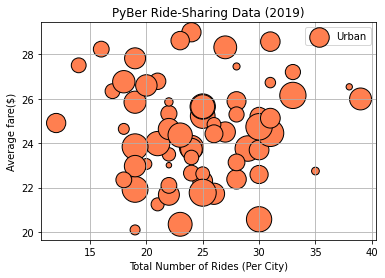

In [49]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, color="coral", edgecolor = "Black", linewidths = 0.8, alpha=1, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

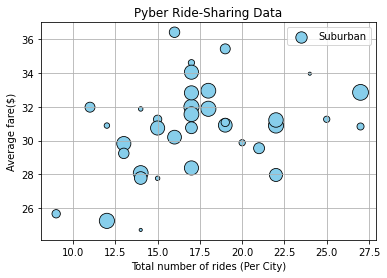

In [57]:
# Build the scatter plots for Suburban cities.
plt.scatter(suburban_ride_count, suburbun_avg_fare, s=10*suburban_avg_drivers, color="skyblue", edgecolor="Black", linewidths=0.8, alpha=1, label="Suburban")
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average fare($)")
plt.title("Pyber Ride-Sharing Data")
plt.legend()
plt.grid()

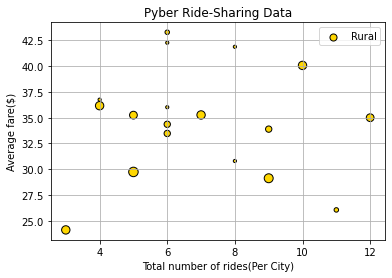

In [56]:
# Build the scatter plots for Rural cities.
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, color="gold", linewidths=1, alpha=1, edgecolor="Black", label="Rural")
plt.xlabel("Total number of rides(Per City)")
plt.ylabel("Average fare($)")
plt.title("Pyber Ride-Sharing Data")
plt.legend()
plt.grid()

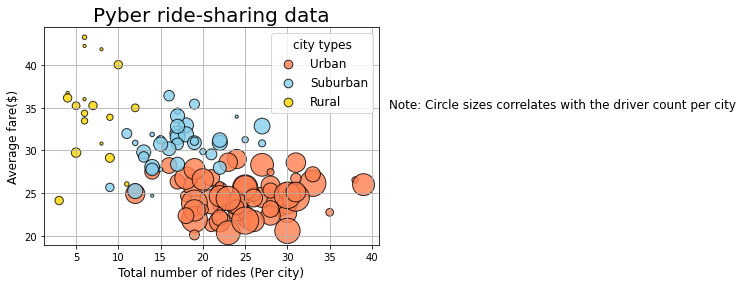

In [70]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_drivers, color="coral", edgecolor = "Black", linewidths = 1, alpha=0.8, label="Urban")


plt.scatter(suburban_ride_count, suburbun_avg_fare, s=10*suburban_avg_drivers, color="skyblue", edgecolor="Black", linewidths=1, alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_drivers, color="gold", linewidths=1, alpha=0.8, edgecolor="Black", label="Rural")

plt.xlabel("Total number of rides (Per city)", fontsize=12)
plt.ylabel("Average fare($)", fontsize=12)
plt.title("Pyber ride-sharing data", fontsize=20)
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="city types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35, "Note: Circle sizes correlates with the driver count per city", fontsize="12")
plt.show()